In [11]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.metrics import sensitivity_specificity_support
from scipy import stats

import math
import statistics

In [12]:
df = pd.read_csv("HurstExp.csv")
row_labels = df.get('MSID').values
df = df.drop(['MSID'], axis=1)
column_labels = df.columns.values

df = pd.DataFrame(data=df.values, index=row_labels, columns=column_labels)
df.head()

,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,Left-Amygdala,Left-Accumbens-area,Left-VentralDC,Right-Cerebellum-Cortex,...,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula,EDSS
MS0001_20190107,0.721914,0.819444,0.874553,0.523449,0.672452,0.843963,0.871057,0.785603,0.557484,0.806224,...,0.835764,0.818610,0.688931,0.866469,0.865448,0.823570,0.955532,0.893453,0.801363,0.0
MS0040_20180727,1.014587,1.124041,0.675102,0.961736,1.122655,0.975431,0.599850,0.890772,0.833252,1.056401,...,0.683431,0.563977,0.690230,0.874901,0.654710,0.944056,0.838302,0.772025,0.880916,1.0
MS0046_20170614,0.905897,0.622727,0.821756,0.812483,0.647605,0.661367,0.787013,0.652138,0.674354,1.026209,...,0.910195,0.821902,0.876995,0.668614,0.653504,0.796586,0.810457,0.638531,0.793825,0.0
MS0084_20171213,0.876768,1.064937,0.538211,0.861743,0.895148,0.988784,0.954015,1.243769,0.794158,0.709511,...,0.917100,0.797456,0.598483,1.202654,0.662482,1.030432,0.835092,0.577397,0.590235,1.0
MS0087_20180822,0.882428,0.913203,0.990005,0.561911,0.745068,1.092247,0.747737,0.870169,0.713600,0.962238,...,0.961791,0.706221,1.085126,0.800457,0.770654,0.875797,0.661838,0.692687,0.974985,1.5


In [13]:
#shuffle and clean up data
EDSS = df['EDSS']
data = df.drop(['EDSS'],axis=1)
data.head()

,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,Left-Amygdala,Left-Accumbens-area,Left-VentralDC,Right-Cerebellum-Cortex,...,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula
MS0001_20190107,0.721914,0.819444,0.874553,0.523449,0.672452,0.843963,0.871057,0.785603,0.557484,0.806224,...,0.850324,0.835764,0.818610,0.688931,0.866469,0.865448,0.823570,0.955532,0.893453,0.801363
MS0040_20180727,1.014587,1.124041,0.675102,0.961736,1.122655,0.975431,0.599850,0.890772,0.833252,1.056401,...,1.067692,0.683431,0.563977,0.690230,0.874901,0.654710,0.944056,0.838302,0.772025,0.880916
MS0046_20170614,0.905897,0.622727,0.821756,0.812483,0.647605,0.661367,0.787013,0.652138,0.674354,1.026209,...,0.913108,0.910195,0.821902,0.876995,0.668614,0.653504,0.796586,0.810457,0.638531,0.793825
MS0084_20171213,0.876768,1.064937,0.538211,0.861743,0.895148,0.988784,0.954015,1.243769,0.794158,0.709511,...,0.946002,0.917100,0.797456,0.598483,1.202654,0.662482,1.030432,0.835092,0.577397,0.590235
MS0087_20180822,0.882428,0.913203,0.990005,0.561911,0.745068,1.092247,0.747737,0.870169,0.713600,0.962238,...,0.934941,0.961791,0.706221,1.085126,0.800457,0.770654,0.875797,0.661838,0.692687,0.974985


Text(0.5, 1.0, 'Hurst Exponents')

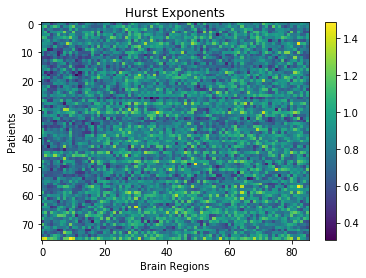

In [14]:
#map of hurst exponents of brain regions
from matplotlib import pyplot as plt
plt.imshow(data, aspect='auto')
plt.colorbar()
plt.xlabel('Brain Regions')
plt.ylabel('Patients')
plt.title('Hurst Exponents')

In [15]:
#categorize EDSS <=1.5 is low, >1.5 is high
n,d = data.shape
for i in range(n):
    if EDSS[i]<=1.5:
        EDSS[i]=0.0
    else:
        EDSS[i]=1.0

In [16]:
#machine learning starts here

In [17]:
def balance_data(X, y):
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)
    sm = SMOTE()
    X_bal, y_bal = sm.fit_resample(X_scaled, y)
        
    return X_bal, y_bal

In [18]:
def best_hp(params, auc):
    
    index = np.argmax(auc)
    print(index)
    best_auc = auc.max()
    ibest_auc = np.where(auc == auc.max())[0]
    num_max = len(ibest_auc)

    best_params = np.zeros((num_max,2))
    
    for i in range(num_max):
        best_params[i][0] = params[ibest_auc[i]][0]
        best_params[i][1] = params[ibest_auc[i]][1]
        
    mode = stats.mode(best_params)[0] #if no unique mode, then smallest of the modes is chosen instead
    
    best_C = mode[0][0]
    best_gamma = mode[0][1]
    
    #best_C = params[index][0]
    #best_gamma = params[index][1]
    
    return best_C, best_gamma, best_auc

In [19]:
def svm_classify(X_train, y_train, X_test, y_test, C, gamma, kernel):
    svm_model = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=True)
    
    X, y = balance_data(X_train, y_train)
    svm_model = svm_model.fit(X, y)
    
    pred = svm_model.predict(X_test)
    pred_score = svm_model.predict_proba(X_test)
    
    auc = metrics.roc_auc_score(y_test, pred_score[:,1], average=None)
    bal_acc = metrics.balanced_accuracy_score(y_test, pred)
    sens, spec, _ = sensitivity_specificity_support(y_test, pred, average='binary')
    
    return auc, bal_acc, sens, spec

In [20]:
def cross_val(k_fold, X, y, C, gamma, kernel):
    kf = model_selection.StratifiedKFold(n_splits=k_fold, shuffle=True)
    
    n, m = len(C), len(gamma)
    params = np.zeros((n*m, 2))
    
    for i in range(n):
        for j in range(m):
            params[i*m+j][0] = C[i]
            params[i*m+j][1] = gamma[j]
                
    all_auc = np.zeros((n*m, k_fold))
    count = k_fold-1
    
    for train, val in kf.split(X, y):
        X_train = X.iloc[train, :]
        y_train = y.iloc[train]
        X_val = X.iloc[val, :]
        y_val = y.iloc[val]
        
        for i in range(n*m):
            auc, _, _, _= svm_classify(X_train, y_train, X_val, y_val, params[i][0], params[i][1], kernel)
            all_auc[i][count] = auc
        
        count -= 1
            
    medians = np.median(all_auc, axis=1)
    #print(medians)
        
    best_C, best_gamma, best_auc = best_hp(params, medians)
    #print(best_auc)
  
    return best_C, best_gamma, best_auc

In [21]:
def make_svm(C, gamma, kernel, data, labels, inner, outer, k_fold):
    #X_tr, X_test, y_tr, y_test = model_selection.train_test_split(data, labels, stratify=labels, test_size=0.2)
    results = []
    kf = model_selection.StratifiedKFold(n_splits=k_fold, shuffle=True)
    
    for j in range(outer):
        
        for train, test in kf.split(data, labels):
            X_tr = data.iloc[train, :]
            y_tr = labels.iloc[train]
            X_test = data.iloc[test, :]
            y_test = labels.iloc[test]
            
            params = np.zeros((inner, 2))
            all_auc = np.zeros(inner)
        
            for n in range(inner):
                good_C, good_gamma, good_auc =  cross_val(5, X_tr, y_tr, C, gamma, kernel)
                params[n][0] = good_C
                params[n][1] = good_gamma
                all_auc[n] = good_auc
    
            best_C, best_gamma, _ = best_hp(params, all_auc)
        
            auc, bal_acc, sens, spec = svm_classify(X_tr, y_tr, X_test, y_test, best_C, best_gamma, kernel)
            results.append([best_C, best_gamma, auc, bal_acc, sens, spec])
    
    return np.array(results)

In [22]:
def run():
    C = []
    gamma = []
    for i in range(-5,3):
        C.append(10**i)
        gamma.append(10**i)

    results = make_svm(C, gamma, 'rbf', data, EDSS, 1, 1, 5)
    return results

In [23]:
def output_format(output):
    med = [[],[],[],[],[],[]]

    out_fmt = 'C: {0}, Gamma: {1}, AUC: {2}, Balanced accuracy: {3}, Sensitivity: {4}, Specificity: {5}'
    for i in range(len(output)):
        med[0].append(output[i][0])
        med[1].append(output[i][1])
        med[2].append(output[i][2])
        med[3].append(output[i][3])
        med[4].append(output[i][4])
        med[5].append(output[i][5])
        print(out_fmt.format(output[i][0], output[i][1], output[i][2], output[i][3], output[i][4], output[i][5]))

In [24]:
output_format(run())

25
0
42
0
43
0
59
0
60
0
C: 0.01, Gamma: 0.0001, AUC: 0.30909090909090914, Balanced accuracy: 0.5, Sensitivity: 0.0, Specificity: 1.0
C: 1.0, Gamma: 0.001, AUC: 0.38181818181818183, Balanced accuracy: 0.5, Sensitivity: 0.0, Specificity: 1.0
C: 1.0, Gamma: 0.01, AUC: 0.45454545454545453, Balanced accuracy: 0.5, Sensitivity: 0.0, Specificity: 1.0
C: 100.0, Gamma: 0.01, AUC: 0.8, Balanced accuracy: 0.5, Sensitivity: 0.0, Specificity: 1.0
C: 100.0, Gamma: 0.1, AUC: 0.39999999999999997, Balanced accuracy: 0.5, Sensitivity: 0.0, Specificity: 1.0


In [105]:
meds = []
for i in range(len(med)):
    meds.append(np.median(med[i]))
new_fmt = 'Medians: ' + out_fmt
print(new_fmt.format(meds[0], meds[1], meds[2], meds[3], meds[4], meds[5]))           

Medians: C: 100.0, Gamma: 0.1, AUC: 0.6181818181818182, Balanced accuracy: 0.0, Sensitivity: 0.0, Specificity: 1.0
